<a href="https://colab.research.google.com/github/anindabitm/TIC-HEAP-Cirta-Particle-Classification-Challenge/blob/master/cirtaChallenge_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Particle type classification

Welcome! 

Using XGBoost

In [0]:
#Import libraries to load and process data
import numpy as np
import pickle
import os
import glob
import pandas as pd
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
print(os. listdir('/content/drive/My Drive/Cirta_challenge/train'))

['event3.pkl', 'event4.pkl', 'event1.pkl', 'event2.pkl', 'event9.pkl', 'event8.pkl', 'event7.pkl', 'event6.pkl', 'event5.pkl', 'event20.pkl', 'event19.pkl', 'event18.pkl', 'event17.pkl', 'event16.pkl', 'event15.pkl', 'event14.pkl', 'event13.pkl', 'event12.pkl', 'event11.pkl', 'event10.pkl', 'event343.pkl', 'event344.pkl', 'event345.pkl', 'event346.pkl', 'event347.pkl', 'event348.pkl', 'event349.pkl', 'event350.pkl', 'event341.pkl', 'event342.pkl', 'event55.pkl', 'event56.pkl', 'event57.pkl', 'event58.pkl', 'event59.pkl', 'event60.pkl', 'event50.pkl', 'event51.pkl', 'event52.pkl', 'event53.pkl', 'event54.pkl']


In [0]:
# replace by your own file path
path='/content/drive/My Drive/Cirta_challenge/train/'
files_list=os.listdir('/content/drive/My Drive/Cirta_challenge/train')
data=np.array([])
target=np.array([])
for files in files_list:
  pkl_file = open(path+files, 'rb')
  event=pickle.load(pkl_file)
  data=np.concatenate([data,event[0]],0)
  target=np.concatenate([target,event[1]],0)

In [0]:
print(data.shape)
print(target.shape)

(130061,)
(130061,)


In [0]:
# get the data and target
target=target.astype('int')

In [0]:
# code to particle name dictionary -- more here : 
dic_types={11: "electron", 13 : "muon", 211:"pion", 321:"kaon",2212 : "proton"}

## Example  of a particle

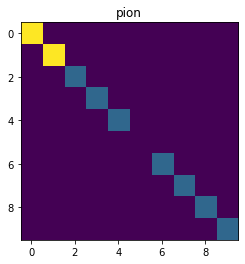

In [0]:
import matplotlib.pyplot as plt
plt.title(dic_types[target[100]])
plt.imshow(data[100])
plt.show()

## Distribution of particles in an event

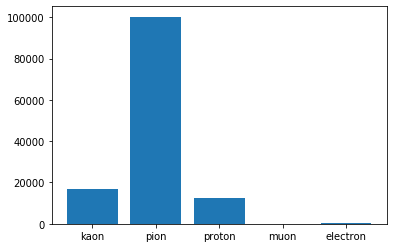

In [0]:

from collections import Counter

plt.bar(range(len(dic_types)),list(Counter(target).values()))
plt.xticks(range(len(dic_types)), [dic_types[i] for i in list(Counter(target).keys())])
plt.show()

Let us try to predict the particle type with an SVM model from the famous sklearn library. First we split the data into training and test sets.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# we transform the 10x10 images into arrays of 100. You can play with that :) 
X_train, X_test, y_train, y_test = train_test_split(
    [np.concatenate((i)) for i in data], target, test_size=0.20, random_state=42)

In [0]:
#new shape of our data
np.array(X_train).shape, np.array(y_train).shape

((104048, 100), (104048,))

In [0]:
# particle distribution in our training
Counter(y_train)

Counter({11: 270, 13: 118, 211: 80183, 321: 13466, 2212: 10011})

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

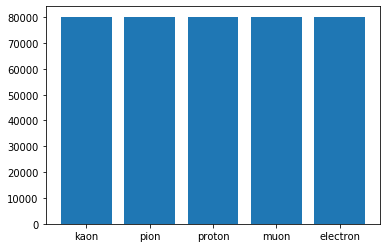

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
plt.bar(range(len(dic_types)),list(Counter(y_train_res).values()))
plt.xticks(range(len(dic_types)), [dic_types[i] for i in list(Counter(target).keys())])
plt.show()

In [0]:
Counter(y_train_res)

Counter({11: 80183, 13: 80183, 211: 80183, 321: 80183, 2212: 80183})

In [0]:
import xgboost as xgb
xg_cl = xgb.XGBClassifier(n_estimators=50,random_state=123)

In [0]:
from sklearn.metrics import log_loss
#from sklearn.model_selection import cross_val_score
#print("Cross validation accuracy score is:",np.mean(cross_val_score(xg_cl,X_train_res,y_train_res,scoring='accuracy',cv=10)))

In [0]:
xg_cl.fit(X_train_res,y_train_res,eval_set=[(X_test,y_test)],eval_metric='mlogloss',early_stopping_rounds=2)

[0]	validation_0-mlogloss:1.60507
Will train until validation_0-mlogloss hasn't improved in 2 rounds.
[1]	validation_0-mlogloss:1.60121
[2]	validation_0-mlogloss:1.59702
[3]	validation_0-mlogloss:1.59268
[4]	validation_0-mlogloss:1.5874
[5]	validation_0-mlogloss:1.58335
[6]	validation_0-mlogloss:1.57741
[7]	validation_0-mlogloss:1.57269
[8]	validation_0-mlogloss:1.56587
[9]	validation_0-mlogloss:1.56033
[10]	validation_0-mlogloss:1.55676
[11]	validation_0-mlogloss:1.55294
[12]	validation_0-mlogloss:1.54834
[13]	validation_0-mlogloss:1.54335
[14]	validation_0-mlogloss:1.54072
[15]	validation_0-mlogloss:1.53619
[16]	validation_0-mlogloss:1.52932
[17]	validation_0-mlogloss:1.52593
[18]	validation_0-mlogloss:1.52148
[19]	validation_0-mlogloss:1.51668
[20]	validation_0-mlogloss:1.50994
[21]	validation_0-mlogloss:1.505
[22]	validation_0-mlogloss:1.50165
[23]	validation_0-mlogloss:1.49733
[24]	validation_0-mlogloss:1.49194
[25]	validation_0-mlogloss:1.48937
[26]	validation_0-mlogloss:1.48523


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# particle distribution in our test
Counter(y_test)

Counter({11: 85, 13: 19, 211: 20041, 321: 3437, 2212: 2431})

In [0]:
preds=xg_cl.predict(X_test)
#preds_proba=xg_cl.predict_proba(X_test)

In [0]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ")
print(accuracy_score(preds,y_test))

Accuracy score: 
0.3938799830853804


In [0]:
#we have now reduced our test sample ! 
idx_non_pion=np.where(y_test!=211)[0]
Counter(y_test[idx_non_pion])

Counter({11: 85, 13: 19, 321: 3437, 2212: 2431})

In [0]:
#let's see how our model behaves then

print(accuracy_score(xg_cl.predict(np.array(X_test)[idx_non_pion]),np.array(y_test)[idx_non_pion]))

0.2721031480241125


In [0]:
pkl_file_test = open('/content/drive/My Drive/Cirta_challenge/test/data_test_file.pkl', 'rb')
event_test=pickle.load(pkl_file_test)
data_test=np.asarray(event_test)[:,1]
print(data_test.shape)
test=[np.concatenate((i)) for i in data_test]
print(np.array(test).shape)

(4195,)
(4195, 100)


In [0]:
pred_proba=xg_cl.predict_proba(test)
print(pred_proba[0])

[0.16627972 0.21644671 0.27455676 0.20056248 0.14215437]


In [0]:
df=pd.read_csv('/content/drive/My Drive/Cirta_challenge/test/SampleSubmission2.csv',)
print(df.head())
df['electron']=pred_proba[:,0]
df['muon']=pred_proba[:,1]
df['pion']=pred_proba[:,2]
df['kaon']=pred_proba[:,3]
df['proton']=pred_proba[:,4]
print(df.head())

   image  electron  muon  pion  kaon  proton
0      0      0.00  0.13  0.98  0.76    0.55
1      1      0.98  0.34  0.78  0.22    0.01
2      2       NaN   NaN   NaN   NaN     NaN
3      3       NaN   NaN   NaN   NaN     NaN
4      4       NaN   NaN   NaN   NaN     NaN
   image  electron      muon      pion      kaon    proton
0      0  0.166280  0.216447  0.274557  0.200562  0.142154
1      1  0.158792  0.084835  0.243129  0.273866  0.239378
2      2  0.165235  0.047069  0.282854  0.277539  0.227302
3      3  0.098956  0.135426  0.322026  0.228574  0.215018
4      4  0.232101  0.089966  0.237905  0.228868  0.211160


In [0]:
print(df.shape)
df.to_csv('results.csv',index=False)

(4195, 6)


In [0]:
from google.colab import files
files.download('results.csv') 